# ***深度学习基础***

# QA
----
## **1. 什么层（layer）或操作（operation）赋予了深度学习模型非线形关系学习能力**
### 是非线性的激活函数是模型具有非线性关系的学习能力，包括relu，sigmoid，tanh等函数。

-----

## **2. batch_size 选择有什么讲究吗？**
### 将训练数据分batch输入模型，是出于节约内存和训练时间的考虑。batch的选择决定了梯度下降的方向。
### 一方面，如果batch过大，对于一些大数据，一次性载入所有的数据进并不可行。此外，以 Rprop 的方式迭代，会由于各个 Batch 之间的采样差异性，各次梯度修正值相互抵消，无法修正
### 同样，如果batch过小，可能和总体数据分布有差别，使下降方向不稳定，难以收敛。比如batch为1的极端情况，这就是在线学习（Online Learning）。线性神经元在均方误差代价函数的错误面是一个抛物面，横截面是椭圆。对于多层神经元、非线性网络，在局部依然近似是抛物面。使用在线学习，每次修正方向以各自样本的梯度方向修正，横冲直撞各自为政，难以达到收敛。
### 

----

## **3. Adam 的优势是什么？**
### Adam与经典的随机梯度下降法是不同的。随机梯度下降保持一个单一的学习速率(称为alpha)，用于所有的权重更新，并且在训练过程中学习速率不会改变。
### 自适应梯度算法(AdaGrad)维护一个参数的学习速率，可以提高在稀疏梯度问题上的性能(例如，自然语言和计算机视觉问题)。均方根传播(RMSProp)也维护每个参数的学习速率，根据最近的权重梯度的平均值(例如变化的速度)来调整。这意味着该算法在线上和非平稳问题上表现良好(如:噪声)。而 Adam 通过计算梯度的一阶矩估计和二阶矩估计而为不同的参数设计独立的自适应性学习率。SGD-M在SGD基础上增加了一阶动量，AdaGrad和AdaDelta在SGD基础上增加了二阶动量。把一阶动量和二阶动量都用起来，就是Adam了。
### Adam在深度学习领域内是十分流行的算法，因为它能很快地实现优良的结果。经验性结果证明Adam算法在实践中性能优异，相对于其他种类的随机优化算法具有很大的优势。Adam算法梯度的对角缩放（diagonalrescaling）具有不变性，因此很适合求解带有大规模数据或参数的问题。该算法同样适用于解决大噪声和稀疏梯度的非稳态（non-stationary）问题。超参数可以很直观地解释，并只需要少量调整。





----

In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
x0 = torch.randint(low=0, high=2, size=(1000,1))
x1 = torch.randint(low=0, high=2, size=(1000,1))
# x2 = torch.randint(low=0, high=2, size=(1000,1))
# x3 = torch.randint(low=0, high=2, size=(1000,1))
# x4 = torch.randint(low=0, high=2, size=(1000,1))
y = torch.tensor((x0 == x1) , dtype=int)
y = torch.tensor([1 if i == 0 else 0 for i in y])

C:\Users\SEELEA~1\AppData\Local\Temp/ipykernel_23516/1299828742.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor((x0 == x1) , dtype=int)


In [3]:
x = torch.cat((x0, x1), 1).type(torch.FloatTensor) 
x, y = Variable(x), Variable(y)
x.shape, y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [4]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   
        self.out = torch.nn.Linear(n_hidden, n_output)   

    def forward(self, x):
        x = F.relu(self.hidden(x))     
        x = self.out(x)
        return x

In [5]:
net = Net(n_feature=2, n_hidden=100, n_output=2)    
print(net)  


optimizer = torch.optim.SGD(net.parameters(), lr=0.02, momentum=0.9)
loss_func = torch.nn.CrossEntropyLoss()

Net(
  (hidden): Linear(in_features=2, out_features=100, bias=True)
  (out): Linear(in_features=100, out_features=2, bias=True)
)


In [6]:
x

tensor([[1., 1.],
        [0., 0.],
        [0., 1.],
        ...,
        [1., 1.],
        [1., 1.],
        [0., 1.]])

In [7]:
y

tensor([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
        1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
        1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,

----

In [15]:
x.shape

torch.Size([1000, 2])

In [8]:
out = net(x)   
out.shape

torch.Size([1000, 2])

In [9]:
y.shape

torch.Size([1000])

In [17]:
out = net(x)                
loss = loss_func(out, y)     
optimizer.zero_grad()   
loss.backward()        
optimizer.step()
_,xx = torch.max(F.softmax(out), 1)
xx.shape

C:\Users\SEELEA~1\AppData\Local\Temp/ipykernel_23516/4033795852.py:6: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  _,xx = torch.max(F.softmax(out), 1)


torch.Size([1000])

In [11]:
F.softmax(out,1)

tensor([[0.5110, 0.4890],
        [0.5317, 0.4683],
        [0.5178, 0.4822],
        ...,
        [0.5110, 0.4890],
        [0.5110, 0.4890],
        [0.5178, 0.4822]], grad_fn=<SoftmaxBackward>)

C:\Users\SEELEA~1\AppData\Local\Temp/ipykernel_23516/1568036987.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  _, prediction = torch.max(F.softmax(out), 1)


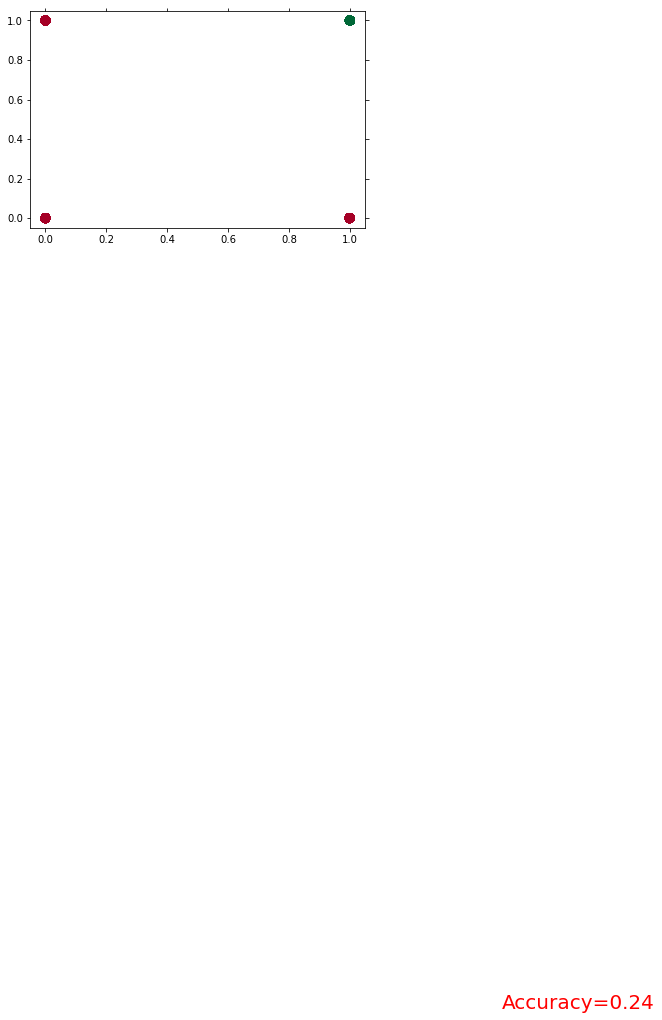

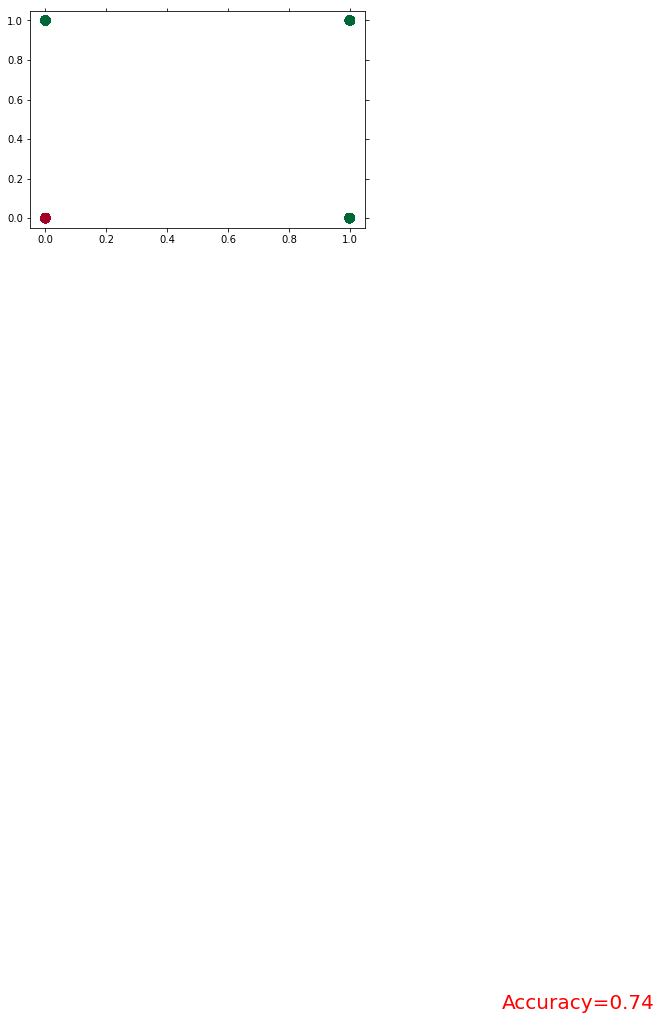

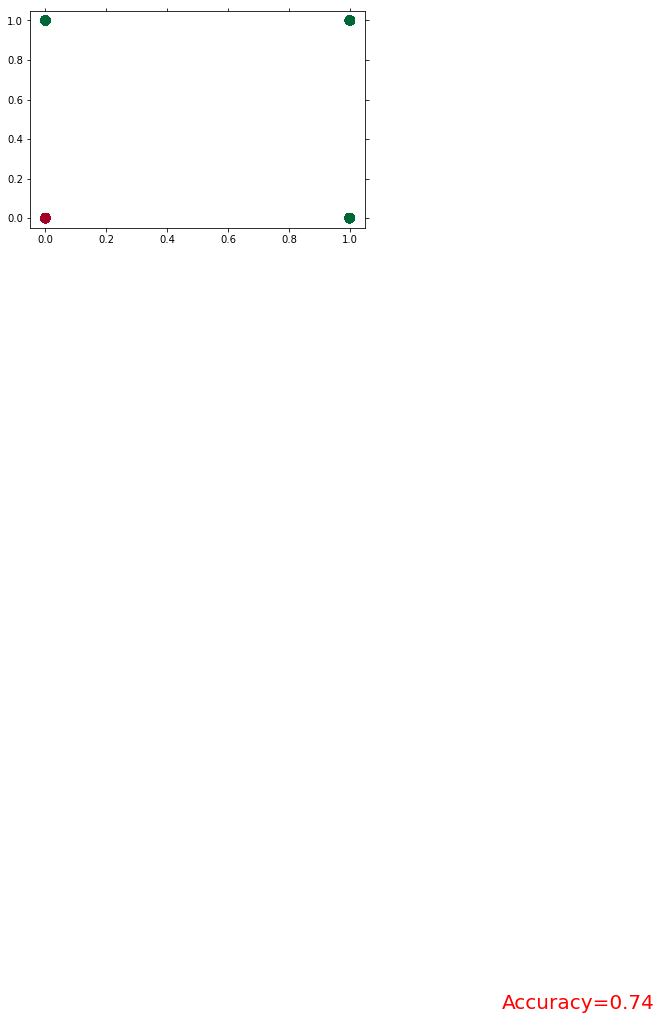

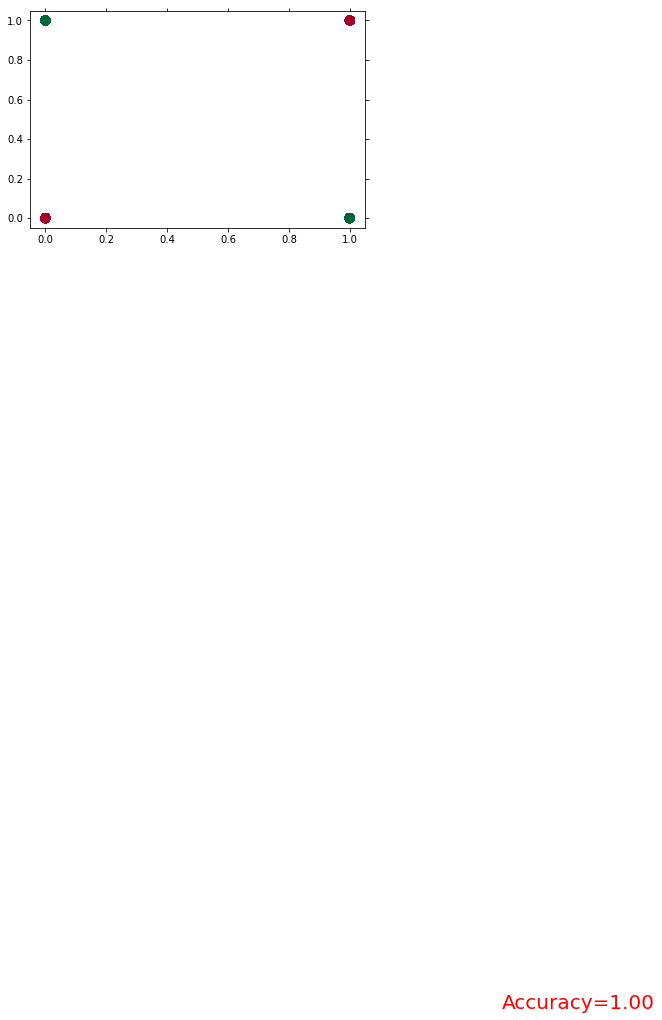

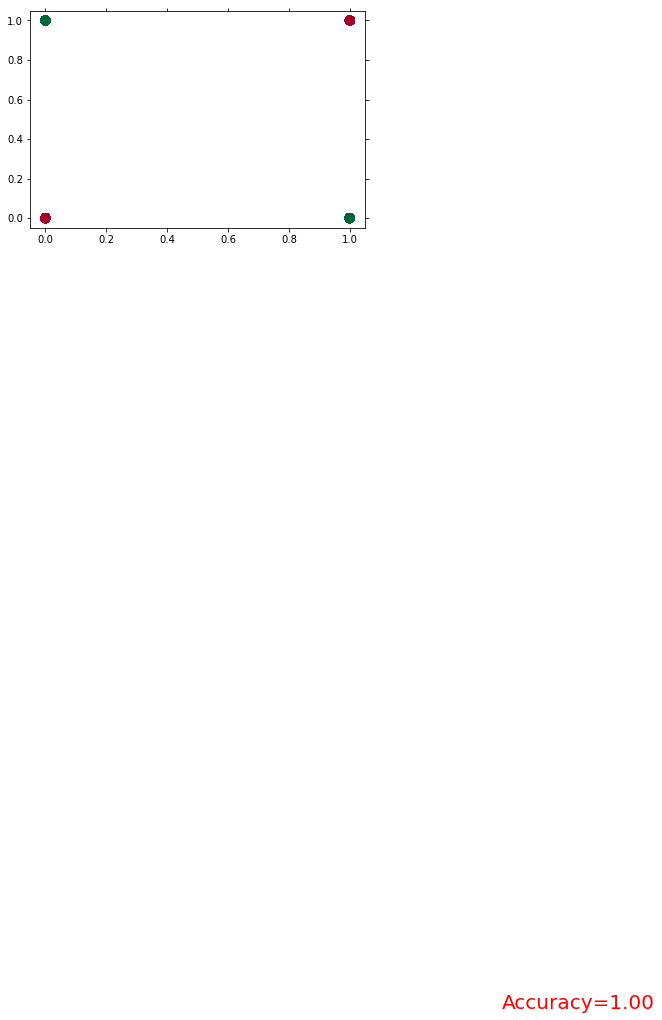

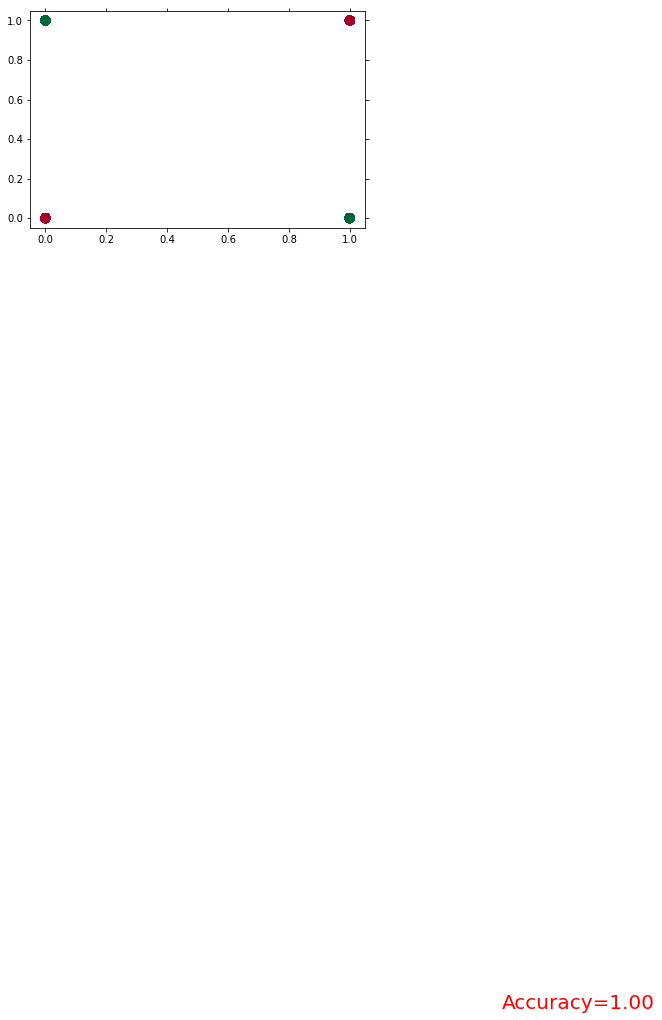

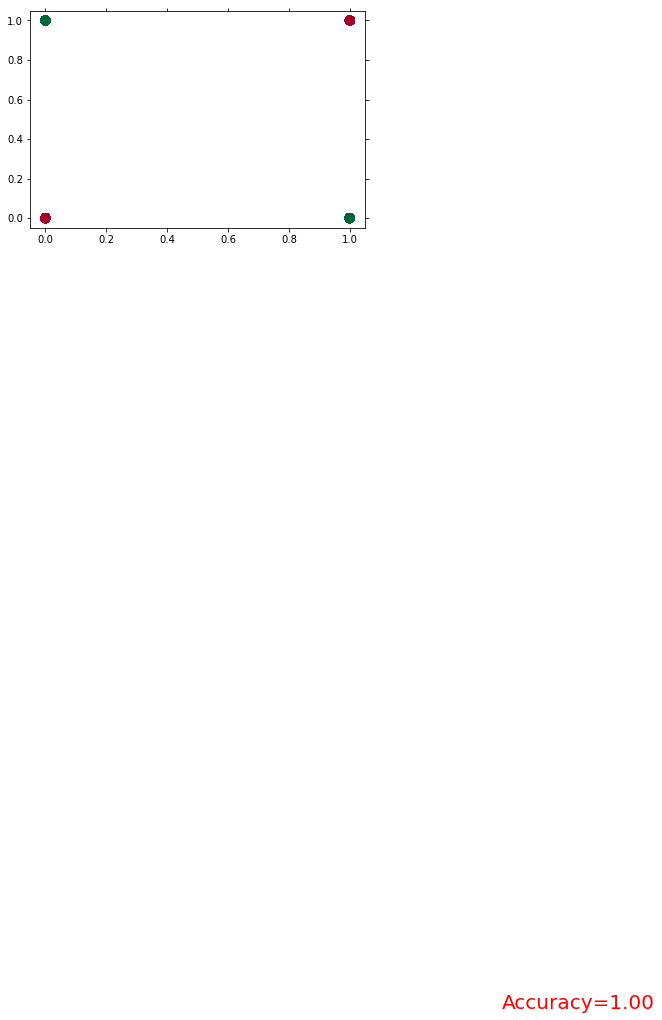

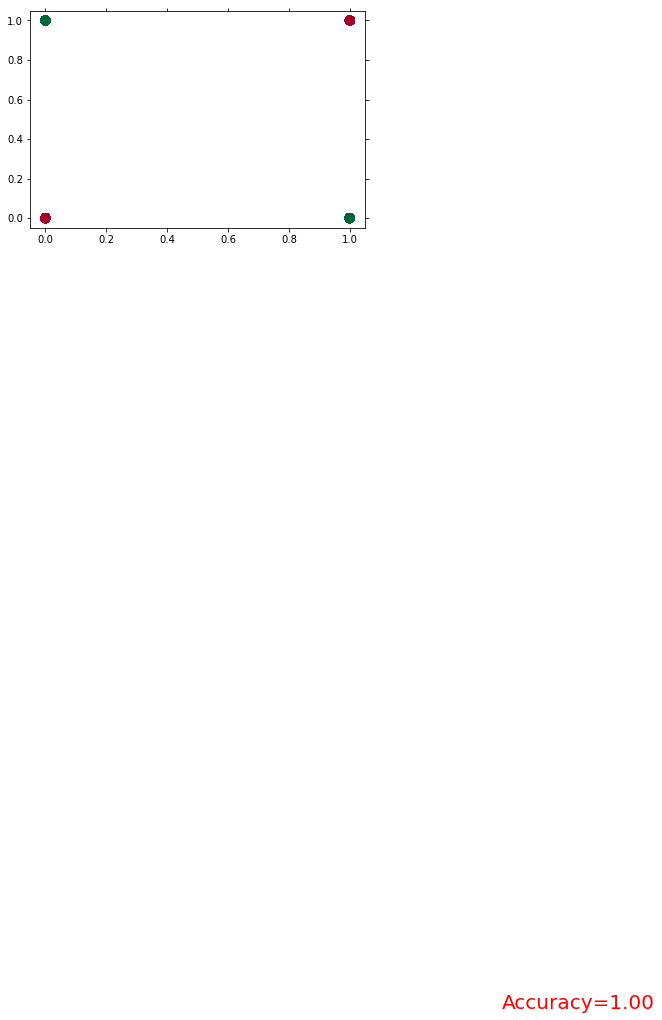

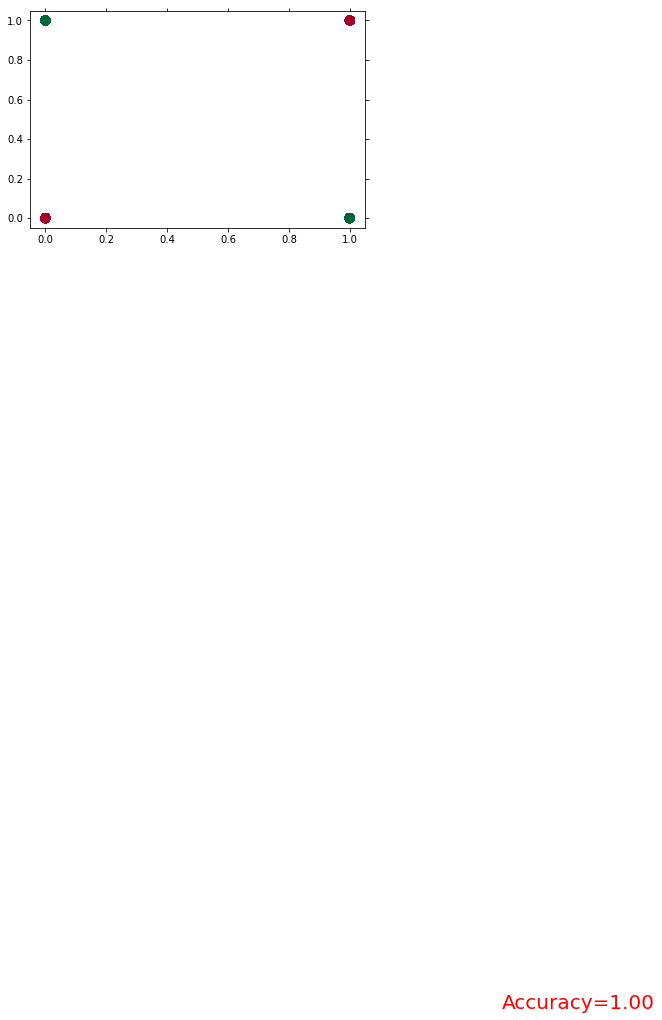

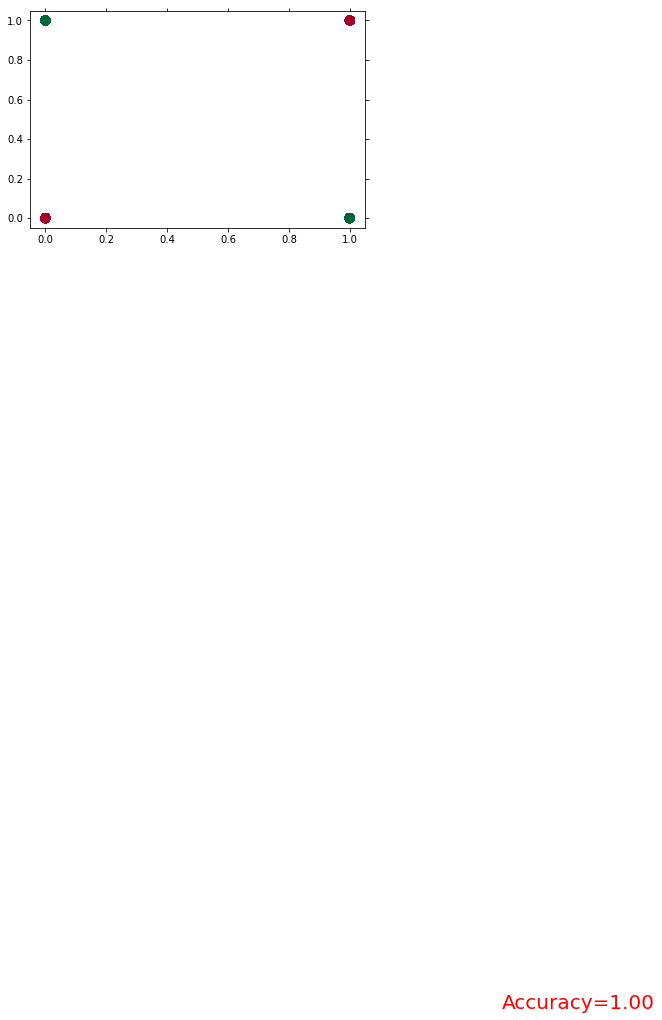

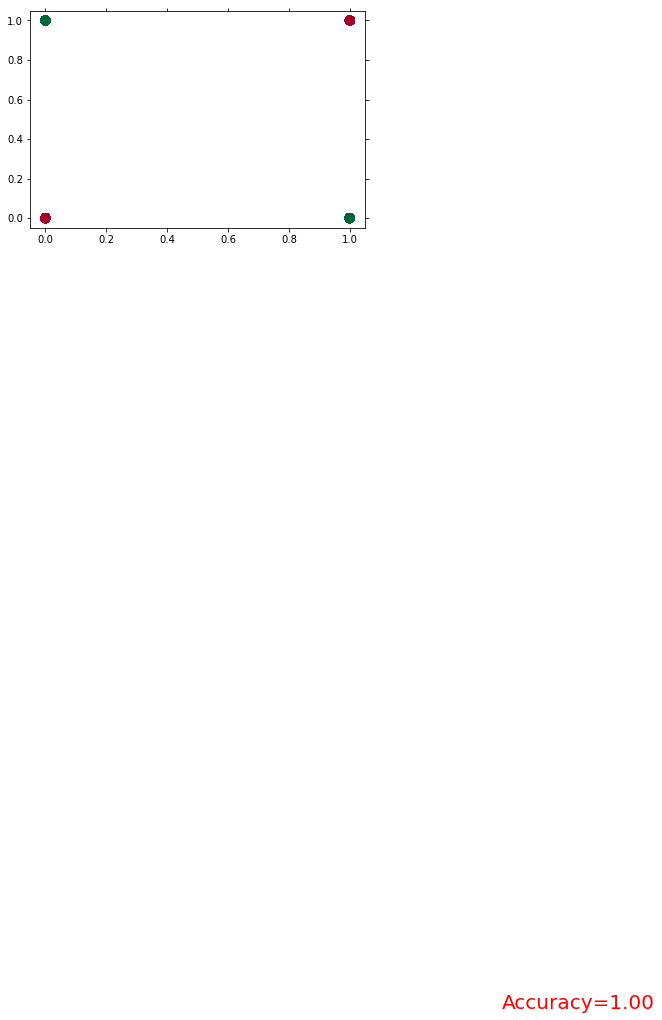

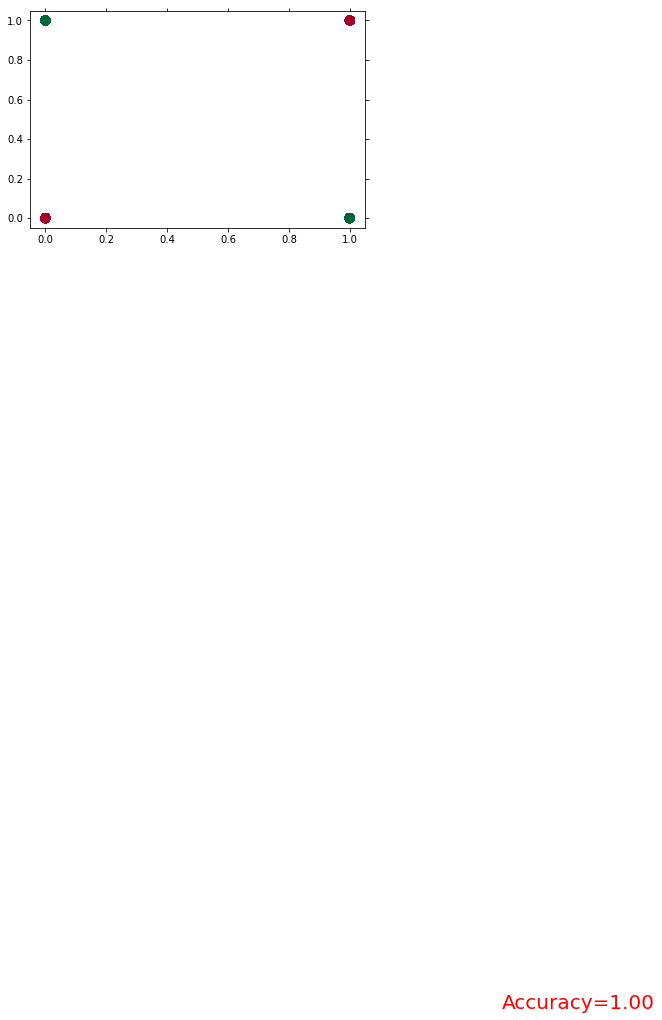

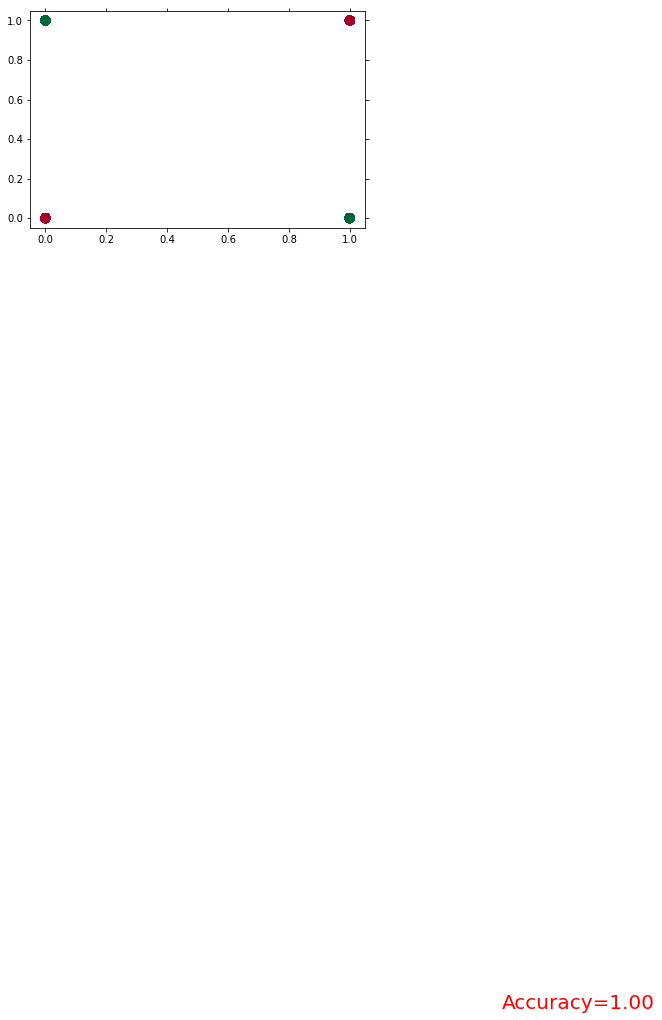

In [12]:
for t in range(40):
    out = net(x)
    loss = loss_func(out, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    t+=1
    if t % 3 == 0:
        plt.cla()
        _, prediction = torch.max(F.softmax(out), 1)
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/1000.
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)


In [13]:
torch.save(net, 'net.pkl')

In [14]:
torch.restore

AttributeError: module 'torch' has no attribute 'restore'